In [1]:
import os
from code_.additional_analysis.rsa import compute_rsa_majajhong, compute_rsa_nsd
from code_.model_activations.loading import load_full_identifier
from config import FIGURES
from code_.model_activations.configs import model_cfg as cfg

In [2]:
dataset = 'majajhong'
region = 'IT'

# dataset = 'naturalscenes'
# region = 'ventral visual stream'

In [3]:
rsa_dict = {}
models = ['expansion','fully_connected','vit']
alexnet_iden = f'alexnet_conv5_layers=5_features=256_dataset={dataset}'

for model_name in models:
    print(f'computing RSA for model: {model_name}')
    rsa_dict[model_name] = []
    model_idens = []
    for features in cfg[dataset]['models'][model_name]['features']:
        activation_iden = load_full_identifier(model_name=model_name, 
                             features = features, 
                             layers=cfg[dataset]['models'][model_name]['layers'], 
                             dataset=dataset)
        model_idens.append(activation_iden) 
    match dataset:
        case 'majajhong':
            for iden in model_idens:
                rsa_dict[model_name].append(compute_rsa_majajhong(iden, region))
        case 'naturalscenes':
            for iden in model_idens:
                rsa_dict[model_name].append(compute_rsa_nsd(iden, region))

print(f'computing RSA for model: alexnet')
match dataset:
    case 'majajhong':
        rsa_alexnet = compute_rsa_majajhong(iden=alexnet_iden,region=region)
    case 'naturalscenes':
        rsa_alexnet = compute_rsa_nsd(iden=alexnet_iden,region=region)       

computing RSA for model: expansion
/data/atlas/.repo_cache_10 expansion_features=3_layers=5_dataset=majajhong


  0%|          | 0/2 [00:00<?, ?it/s]

100%|██████████| 2/2 [00:00<00:00,  4.14it/s]


/data/atlas/.repo_cache_10 expansion_features=30_layers=5_dataset=majajhong


100%|██████████| 2/2 [00:00<00:00,  3.69it/s]


/data/atlas/.repo_cache_10 expansion_features=300_layers=5_dataset=majajhong


100%|██████████| 2/2 [00:01<00:00,  1.71it/s]


/data/atlas/.repo_cache_10 expansion_features=3000_layers=5_dataset=majajhong


100%|██████████| 2/2 [00:07<00:00,  3.87s/it]


/data/atlas/.repo_cache_10 expansion_features=30000_layers=5_dataset=majajhong


100%|██████████| 2/2 [01:34<00:00, 47.02s/it]


computing RSA for model: fully_connected
/data/atlas/.repo_cache_10 fully_connected_features=108_layers=5_dataset=majajhong


100%|██████████| 2/2 [00:00<00:00,  3.90it/s]


/data/atlas/.repo_cache_10 fully_connected_features=1080_layers=5_dataset=majajhong


100%|██████████| 2/2 [00:00<00:00,  3.29it/s]


/data/atlas/.repo_cache_10 fully_connected_features=10800_layers=5_dataset=majajhong


100%|██████████| 2/2 [00:01<00:00,  1.26it/s]


/data/atlas/.repo_cache_10 fully_connected_features=108000_layers=5_dataset=majajhong


100%|██████████| 2/2 [00:12<00:00,  6.13s/it]


/data/atlas/.repo_cache_10 fully_connected_features=1080000_layers=5_dataset=majajhong


100%|██████████| 2/2 [01:21<00:00, 40.57s/it]


computing RSA for model: vit
/data/atlas/.repo_cache_10 vit_features=12_layers=None_dataset=majajhong


100%|██████████| 2/2 [00:00<00:00,  3.16it/s]


/data/atlas/.repo_cache_10 vit_features=60_layers=None_dataset=majajhong


100%|██████████| 2/2 [00:01<00:00,  1.62it/s]


/data/atlas/.repo_cache_10 vit_features=600_layers=None_dataset=majajhong


100%|██████████| 2/2 [00:08<00:00,  4.08s/it]


/data/atlas/.repo_cache_10 vit_features=6000_layers=None_dataset=majajhong


100%|██████████| 2/2 [01:20<00:00, 40.33s/it]


computing RSA for model: alexnet
/data/atlas/.repo_cache_10 alexnet_conv5_layers=5_features=256_dataset=majajhong


100%|██████████| 2/2 [00:01<00:00,  1.88it/s]


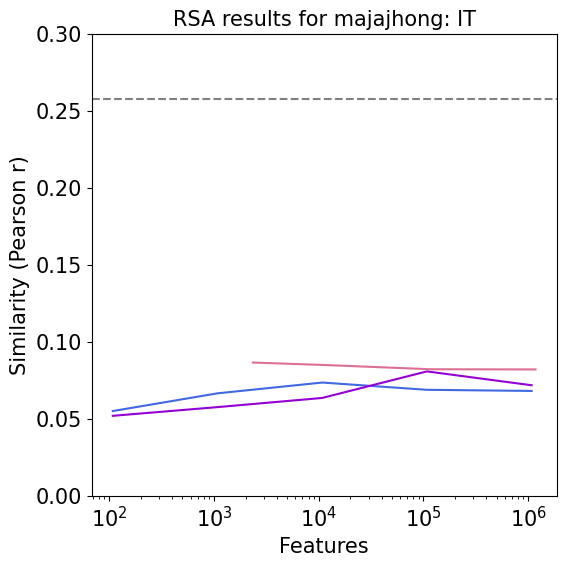

In [4]:
from matplotlib.pyplot import rcParams
import matplotlib.pyplot as plt
import seaborn as sns
# from notebooks.plotting_tools import *

rcParams['figure.figsize'] = (6,6)  
legend_dict ={'expansion':('Convolutional','royalblue'),
        'vit':('Transformer','palevioletred'),
        'fully_connected':('Fully connected','darkviolet')}

# main plot
for model_name in models:
    features = cfg[dataset]['models'][model_name]['features']
    if model_name == 'expansion':
        features = [f*36 for f in features] 
    elif model_name == 'vit':
        features = [f*196 for f in features] 
    else:
        pass
    
    ax1 = sns.lineplot(x=features, 
                       y=rsa_dict[model_name], 
                       c=legend_dict[model_name][1], 
                       label=legend_dict[model_name][0])
# alexnet 
plt.axhline(y=rsa_alexnet, color='gray', linestyle='--', label='AlexNet')

plt.xlabel('Features',size=15)
plt.ylabel('Similarity (Pearson r)',size=15)
plt.ylim(0,0.3) if dataset == 'naturalscenes' else plt.ylim(0,0.3)
plt.xticks(size=15)
plt.yticks(size=15)
plt.title(f'RSA results for {dataset}: {region}',size=15)
ax1.set_xscale("log")    
if region != 'V4':
    ax1.legend()
    ax1.get_legend().remove()
plt.savefig(os.path.join(FIGURES, f'figure_S2_{dataset}_{region}.png'))
plt.show()